In [9]:
import quadrature
import GPy

/home/nishadg/.local/lib/python2.7/site-packages/scipy/io/matlab/mio4.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .mio_utils import squeeze_element, chars_to_strings
/home/nishadg/.local/lib/python2.7/site-packages/scipy/io/matlab/mio5.py:98: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .mio5_utils import VarReader5


In [14]:
import scipy.stats
import numpy as np
def f_temp(x):
    return [scipy.stats.norm(3, 1).pdf(x[0])]
def f(x):
    return [scipy.stats.norm(3, 1).pdf(x[0]),scipy.stats.norm(0, 1).pdf(x[1])]
def flambda(a):
    modifier = scipy.stats.norm(2.5, 1).pdf(a)*0.5 + scipy.stats.norm(-2.5, 1).pdf(a)*0.5
    def f(x):
        return [scipy.stats.norm(0, 1).pdf(x[0]) * modifier]
    return f

In [15]:
X = np.random.uniform(-10,10,size=(5,1))
Y = X.copy()
Y = np.apply_along_axis(flambda(0), 1, Y)
gp = GPy.models.GPRegression(X,Y,GPy.kern.src.rbf.RBF(input_dim=1))

In [16]:
A = {}
actions = np.linspace(-10,10,20)
Xs = {}
Ys = {}
gps = {}
for i,a in enumerate(actions):
    X = np.random.uniform(-10,10,size=(10,1))
    Y = X.copy()
    Y = np.apply_along_axis(flambda(a), 1, Y)
    Xs[a] = X
    Ys[a] = Y
    gps[a] = GPy.models.GPRegression(X,Y,GPy.kern.src.rbf.RBF(input_dim=1))
    arg = quadrature.compute_prereq(gps[a])
    A[a] = quadrature.integrate(gps[a],np.array([0.0]),10.0,*arg)

In [17]:
def extend(rand=False):
    maxa = max(A, key=lambda a:A[a][0]+2*A[a][1])
    if rand:
        maxa = np.random.choice(A.keys())
    print maxa
    X = Xs[maxa]
    X2 = np.random.uniform(-10,10,size=(3,1))
    print X.shape, X2.shape
    Xs[maxa] = np.vstack((X,X2))
    print Xs[maxa].shape
    Y = Xs[maxa].copy()
    Ys[maxa] = np.apply_along_axis(flambda(maxa), 1, Y)
    print Xs[maxa].shape, Ys[maxa].shape
    gps[maxa] = GPy.models.GPRegression(Xs[maxa],Ys[maxa],GPy.kern.src.rbf.RBF(input_dim=1))
    A[maxa] = quadrature.integrate(gps[maxa],np.array([0.0]),10.0,*quadrature.compute_prereq(gps[maxa]))

-5.7894736842105265
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
6.842105263157894
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
7.894736842105264
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
1.5789473684210513
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
1.5789473684210513
(13, 1) (3, 1)
(16, 1)
(16, 1) (16, 1)
-0.526315789473685
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
6.842105263157894
(13, 1) (3, 1)
(16, 1)
(16, 1) (16, 1)
1.5789473684210513
(16, 1) (3, 1)
(19, 1)
(19, 1) (19, 1)
-7.894736842105264
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
7.894736842105264
(13, 1) (3, 1)
(16, 1)
(16, 1) (16, 1)
-6.842105263157895
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
-7.894736842105264
(13, 1) (3, 1)
(16, 1)
(16, 1) (16, 1)
7.894736842105264
(16, 1) (3, 1)
(19, 1)
(19, 1) (19, 1)
-3.6842105263157894
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
2.6315789473684212
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
5.789473684210526
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
8.94736842105263
(10, 1) (3, 1)
(13, 1)
(13, 1) (13, 1)
8.94736842105263
(13

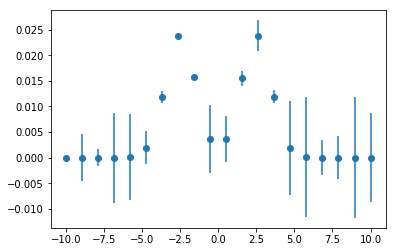

In [18]:
for i in range(100):
    extend(i%5==0)
    x,y,e = [],[],[]
    for a in A:
        x.append(a)
        y.append(A[a][0])
        e.append(A[a][1])
        import matplotlib.pyplot as plt
        plt.clf()
        plt.errorbar(x, y, yerr=e, fmt='o')
        plt.savefig("./imgs/%03d.png" % i)

In [ ]:
X = np.random.uniform(-5,5,size=(100,1))
def f(x):
    return [scipy.stats.norm(0, 1).pdf(x[0])]
Y = X.copy()
Y = np.apply_along_axis(flambda(1), 1, Y)
gp = GPy.models.GPRegression(X,Y,GPy.kern.src.rbf.RBF(input_dim=1))

In [51]:
quadrature.integrate(gp,np.array([0.0]),1.0,*quadrature.compute_prereq(gp))

(0.015230569810171473, 3.289635386316547e-08)

In [2]:
from sklearn.mixture import GMM
import numpy as np
gmm = GMM(1, n_iter=1)
gmm.means_ = np.array([[0]])
gmm.covars_ = np.array([ [1]])
gmm.weights_ = np.array([1.0])


/home/nishadg/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
gmm.score(0)

/home/nishadg/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


array([-0.91893853])

In [5]:
np.exp(-0.91893853)

0.39894228167991214

In [27]:
np.random.multivariate_normal([0,0], [[1,0],[0,1]], (3,))

array([[-0.66604476,  0.44284582],
       [-1.1278173 ,  0.94025331],
       [-0.62713772, -0.68990787]])